# Medical Insurance Cost Prediction

## Importing Libraries

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Data Collection

In [17]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/medical insurance.csv')
df.shape

(1338, 7)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Preprocessing

In [21]:
# handling missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
# Checking for dulpicate values
df.duplicated().sum()

np.int64(1)

In [23]:
# Add small noise to numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols] + np.random.normal(0, 1e-6, size=df[numeric_cols].shape)
df.duplicated().sum()

np.int64(0)

In [24]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['sex', 'smoker', 'region']


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.000000,0,27.900000,-2.090783e-06,1,3,16884.923999
1,18.000000,1,33.770001,1.000000e+00,0,2,1725.552299
2,27.999998,1,33.000001,2.999999e+00,0,2,4449.461999
3,33.000002,1,22.704999,7.301938e-07,0,1,21984.470609
4,32.000000,1,28.879999,1.616170e-07,0,1,3866.855199


In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler

numerical_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_scaling.remove('charges')  # target column

scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])

print("Columns after processing:", df.columns.tolist())
display(df.head())

Columns after processing: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908615,1.970587,1.343905,16884.923999
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,1725.552299
2,-0.797954,0.989591,0.383307,1.580925,-0.507463,0.438495,4449.461999
3,-0.441947,0.989591,-1.305531,-0.908613,-0.507463,-0.466915,21984.470609
4,-0.513149,0.989591,-0.292557,-0.908614,-0.507463,-0.466915,3866.855199


## Training and Evaluation

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [32]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "R2 Score": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, rf_pred),
        r2_score(y_test, xgb_pred)
    ],
    "MAE": [
        mean_absolute_error(y_test, lr_pred),
        mean_absolute_error(y_test, rf_pred),
        mean_absolute_error(y_test, xgb_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, lr_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred)),
        np.sqrt(mean_squared_error(y_test, xgb_pred))
    ]
})

results


,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.783346,4186.508867,5799.587109
1,Random Forest,0.866649,2508.865360,4550.014231
2,XGBoost,0.858540,2755.265960,4686.305927


## Plot and Analysis

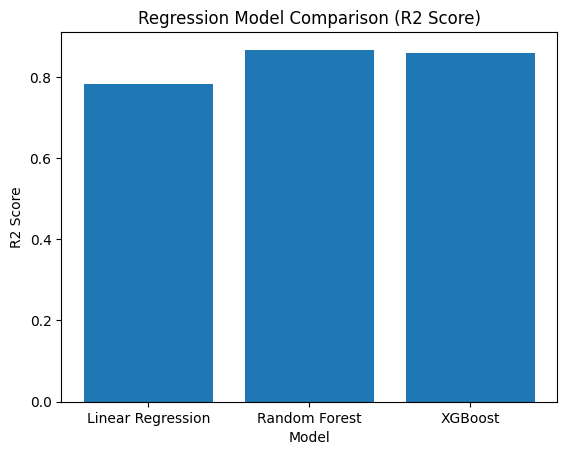

In [34]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results["Model"], results["R2 Score"])
plt.title("Regression Model Comparison (R2 Score)")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.show()


Thanks!